IMPORTING LIBRARIES

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
data=pd.read_csv('iris.data')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# DATA VISUALIZATION

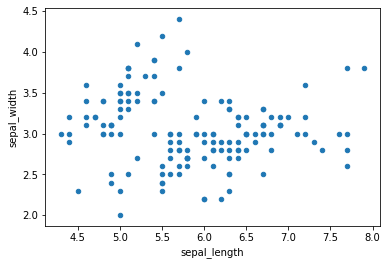

In [4]:
data.plot(x='sepal_length',y='sepal_width',kind='scatter')

C:\Users\BHAVANABhavana\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


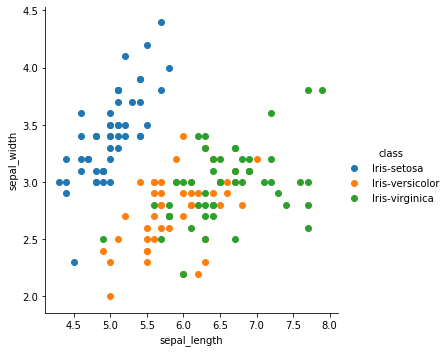

In [5]:
sns.FacetGrid(data,hue='class',size=5).map(plt.scatter,'sepal_length','sepal_width').add_legend()

In [6]:
X=data.iloc[:,:-1].values

In [7]:
X[:,0:2] #sepal_length,sepal_width

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [8]:
Y=data.iloc[:,4].values

In [9]:
Y[:5]#checking top5 results
Y.shape

(150,)

ENCODING OF THE CATEGORICAL DEPENDENT VARIABLE

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)           

In [11]:
np.unique(Y) #0 for Setosa , 1 for Versicolor, 2 for virginica

array([0, 1, 2])

Splitting the values into train set and test set

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
#test_size will have 30 observations

In [23]:
Y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

# FIT A MODEL TO TRAINING SET RBF KERNEL

In [68]:
from sklearn.svm import SVC
reg=SVC(kernel='rbf',gamma='auto',C=0.9)
reg.fit(X_train[:,0:2],Y_train)

SVC(C=0.9, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

PREDICT FUNCTION

In [69]:
Y_pred=reg.predict(X_test[:,0:2]) #for rbf kernel

PLOT SVM

In [70]:
def mesh_grid(X,Y,h=0.01):
    '''
    a function that does mesh grid
    X axis --- one feature of X
    Y axis --- another feature of X
    '''
    x_min,x_max=X.min()-1,X.max()+1
    y_min,y_max=Y.min()-1,Y.max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                     np.arange(y_min,y_max,h))
    return xx,yy
    

In [162]:
from matplotlib.colors import ListedColormap
X_set,Y_set=X_train[:,0:2],Y_train
X1,X2=mesh_grid(X_set[:,0],X_set[:,1]) #taking out columns of sepal_length, sepal_width

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


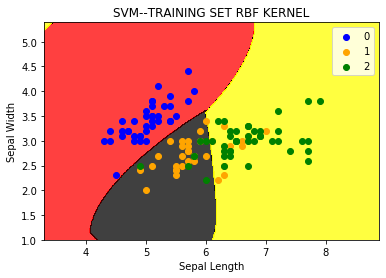

In [163]:
plt.contourf(X1,X2,reg.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap=ListedColormap(('red','black','yellow')))
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set==j,0],X_set[Y_set==j,1],
                c=ListedColormap(('blue','orange','green'))(i),label=j)
plt.title('SVM--TRAINING SET RBF KERNEL')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

# Confusion Matrix

In [164]:
from sklearn.metrics import confusion_matrix
results=confusion_matrix(Y_test,Y_pred) #rbf kernel
results

array([[11,  0,  0],
       [ 0,  5,  8],
       [ 0,  3,  3]], dtype=int64)

In [165]:
print('The accuracy score of SVC with Gaussian Kernel is: ',sk.metrics.accuracy_score(Y_test,Y_pred))

The accuracy score of SVC with Gaussian Kernel is:  0.6333333333333333


# FIT A MODEL TO TRAINING SET LINEAR KERNEL

In [166]:
from sklearn.svm import LinearSVC
reg1=LinearSVC(C=1)
reg1.fit(X_train[:,0:2],Y_train)

C:\Users\BHAVANABhavana\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [167]:
Y_pred1=reg1.predict(X_test[:,0:2]) #for LInear SVC kernel

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


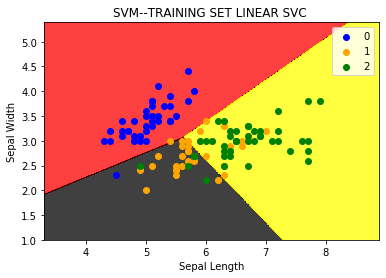

In [168]:
plt.contourf(X1,X2,reg1.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap=ListedColormap(('red','black','yellow')))
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set==j,0],X_set[Y_set==j,1],
                c=ListedColormap(('blue','orange','green'))(i),label=j)
plt.title('SVM--TRAINING SET LINEAR SVC ')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

In [169]:
from sklearn.metrics import confusion_matrix
results=confusion_matrix(Y_test,Y_pred1) #LINEARSVC kernel
results

array([[11,  0,  0],
       [ 0,  4,  9],
       [ 0,  2,  4]], dtype=int64)

In [170]:
print('The accuracy score of SVC with Gaussian Kernel is: ',sk.metrics.accuracy_score(Y_test,Y_pred1))

The accuracy score of SVC with Gaussian Kernel is:  0.6333333333333333


# FIT A MODEL TO TRAINING SET POLINOMIAL KERNEL

In [171]:
from sklearn.svm import SVC
reg2=SVC(kernel='poly',C=2,degree=2) #best degree is 2
reg2.fit(X_train[:,0:2],Y_train)

C:\Users\BHAVANABhavana\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [172]:
Y_pred2=reg2.predict(X_test[:,0:2]) #for POLY kernel

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


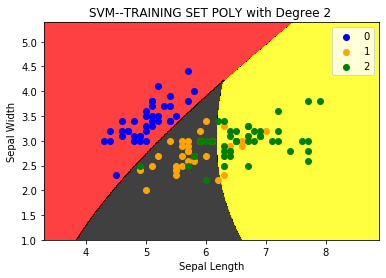

In [173]:
plt.contourf(X1,X2,reg2.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap=ListedColormap(('red','black','yellow')))
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set==j,0],X_set[Y_set==j,1],
                c=ListedColormap(('blue','orange','green'))(i),label=j)
plt.title('SVM--TRAINING SET POLY with Degree 2 ')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

In [174]:
from sklearn.metrics import confusion_matrix
results=confusion_matrix(Y_test,Y_pred2) #POLYkernel
results

array([[11,  0,  0],
       [ 0,  8,  5],
       [ 0,  3,  3]], dtype=int64)

In [175]:
print('The accuracy score of SVC with Gaussian Kernel is: ',sk.metrics.accuracy_score(Y_test,Y_pred2))

The accuracy score of SVC with Gaussian Kernel is:  0.7333333333333333


#INFERENCE IS POLYNOMIAL KERNEL PERFORMS BETTER THAN ANYTHING ELSE